## Final-lab FAI: cycle finding using local and global search   
- in this lab we gonna implement two algorithms to solve cycle finding problem for a not fully connected city of 100 nodes , this problem looks similar as `tsp` but with a constraint of only cities with distances < 9O km are connected.
- we're using:
   - 1 . **genetic Algorithm**
   - 2 . **Hill climbing Algorithm**

### problem definition
the definition of the problem space is simply a space of coordonate of city we can generate them randomly or read them from a file ,
based on this coordonate we generate a graph that define the connections between cities.

In [ ]:
def read_coords(file_path):
    coords = []
    try:
        with open(file_path, 'r') as file:
            for line in file:
                try:
                    x, y = line.strip().split(',')
                    coords.append((float(x), float(y)))
                except ValueError:
                    print(f"Skipping invalid line: {line.strip()}")
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    return coords

# Example usage
file_path = "C:\\Users\\Windows\\Downloads\\city100.txt"
coords = read_coords(file_path)

# Print the first few coordinates to verify
print(coords[:5])


Graph (Node connections):
Node 0: [12, 15, 18, 21, 33, 47, 75, 79, 88]
Node 1: [17, 25, 28, 31, 58, 95]
Node 2: [37, 47, 50, 55, 57, 61, 74, 83, 88, 96]
Node 3: [9, 29, 72, 84, 87, 90, 97, 99]
Node 4: [29, 75, 84, 92, 93, 98, 99]
Node 5: [7, 9, 31, 51, 52, 65, 77, 78, 80]
Node 6: [15, 24, 34, 66, 76, 91]
Node 7: [5, 51, 52, 65, 77, 78]
Node 8: [20, 56, 85, 94]
Node 9: [3, 5, 37, 61, 69, 72, 78, 80, 84, 87, 97]
Node 10: [26, 35, 41, 56, 67, 85]
Node 11: [32, 38, 39, 48, 60, 62, 68, 71, 86, 89]
Node 12: [0, 15, 18, 21, 39, 60, 75]
Node 13: [19, 28, 40, 44, 59, 63, 73, 87]
Node 14: [36, 49, 53]
Node 15: [0, 6, 12, 18, 21, 33, 34, 66, 91]
Node 16: [41, 73, 81]
Node 17: [1, 25, 28, 31, 52, 54, 58, 95]
Node 18: [0, 12, 15, 21, 39, 60, 68, 75, 91, 92]
Node 19: [13, 28, 59, 63, 73]
Node 20: [8, 27, 62, 86, 94]
Node 21: [0, 12, 15, 18, 33, 70, 75, 79, 91]
Node 22: [30, 36, 42, 45, 51, 65, 77]
Node 23: [43, 49, 53, 64, 82]
Node 24: [6, 34, 38, 48, 76]
Node 25: [1, 17, 58, 95]
Node 26: [10, 35, 5

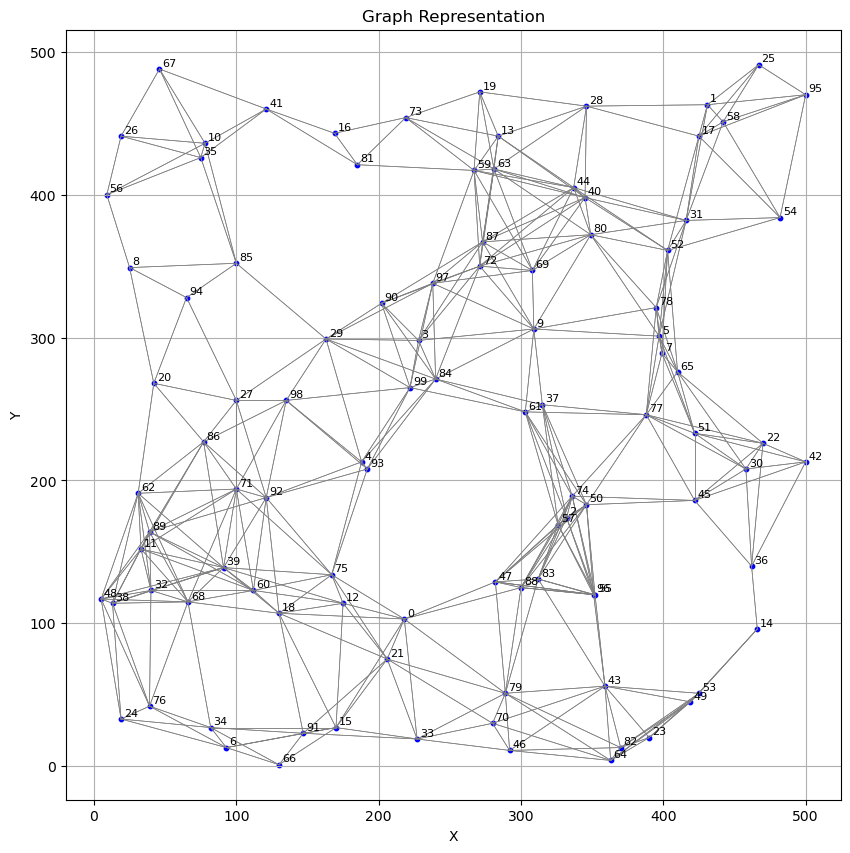

In [ ]:
import random
import math
import matplotlib.pyplot as plt

# implementation of genetic algorithm to solve the problem


# Step 1: Generate 100 random points in a 500x500 grid
def generate_random_points(num_points=100, grid_size=500):
    return [(random.randint(0, grid_size), random.randint(0, grid_size)) for _ in range(num_points)]

# Step 2: Calculate the Euclidean distance
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Step 3: Build the graph
def generate_graph(points, max_distance=90):
    graph = {}
    for i in range(len(points)):
        graph[i] = []  # Initialize adjacency list for node i
        for j in range(len(points)):
            if i != j:
                distance = euclidean_distance(points[i], points[j])
                if distance < max_distance:
                    graph[i].append(j)
    return graph

# Step 4: Visualize the graph
def plot_graph(points, graph):
    plt.figure(figsize=(10, 10))
    for i, point in enumerate(points):
        # Plot each point
        plt.scatter(point[0], point[1], color="blue", s=10)
        plt.text(point[0] + 2, point[1] + 2, str(i), fontsize=8)  # Label the points
        # Draw connections
        for connected_node in graph[i]:
            connected_point = points[connected_node]
            plt.plot([point[0], connected_point[0]], [point[1], connected_point[1]], color="gray", linewidth=0.5)

    plt.title("Graph Representation")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    random_points = generate_random_points()
    graph = generate_graph(random_points)

    # Print the graph in text format
    print("Graph (Node connections):")
    for node, connections in graph.items():
        print(f"Node {node}: {connections}")

    # Visualize the graph
    plot_graph(random_points, graph)


### Plot of individuals or cycles in the graph

In [ ]:
# draw the path of the individual in the previous graph

def plot_graph_(points, graph , individual):
    plt.figure(figsize=(10, 10))
    for i, point in enumerate(points):
        # Plot each point
        plt.scatter(point[0], point[1], color="blue", s=10)
        plt.text(point[0] + 2, point[1] + 2, str(i), fontsize=8)  # Label the points
        # Draw connections
        for connected_node in graph[i]:
            connected_point = points[connected_node]
            plt.plot([point[0], connected_point[0]], [point[1], connected_point[1]], color="gray", linewidth=0.5)
        for i in range(len(individual) - 1):
            node1 = individual[i]
            node2 = individual[i + 1]
            point1 = points[node1]
            point2 = points[node2]
            plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color="red", linewidth=2)
    plt.title("Graph Representation")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()



### creation of a random cycle

In [ ]:
# for cycle solution
def create_cycle(graph):
    # Randomly select a starting node
    start = random.choice(list(graph.keys()))
    individual = [start]
    visited = set(individual)  # Keep track of visited nodes for efficiency

    while True:  # Loop until the start node equals the current node and all nodes are visited
        current_node = individual[-1]
        neighbors = graph[current_node]

        # Filter unvisited neighbors
        unvisited_neighbors = [node for node in neighbors if node not in visited]

        if unvisited_neighbors:
            # Add an unvisited neighbor to the individual
            next_node = random.choice(unvisited_neighbors)
            individual.append(next_node)
            visited.add(next_node)
        else:
            # If all neighbors are visited, jump to the starting node
            if start in neighbors and len(visited) == len(graph):
                individual.append(start)  # Close the cycle
                break
            else:
                # If the start node is not directly reachable, jump to another node
                remaining_nodes = [node for node in neighbors if node != current_node]
                if remaining_nodes:
                    next_node = random.choice(remaining_nodes)
                    individual.append(next_node)
                else:
                    break  # Prevent infinite loop if no path is possible

    return individual

### function to veify the validity of the cycle :
- the start node ?= end nodes.
- all the nodes are visited.
- there is not invalid connection.

In [ ]:
# validate the cycle
def is_valid_cycle(cycle):
    # Check if the first and last nodes are the same
    if cycle[0] != cycle[-1]:
        return False
    # check if all nodes are visited
    if len(set(cycle)) != len(graph):
        return False
    # Check if all consecutive pairs are connected
    for i in range(len(cycle) - 1):
        if cycle[i + 1] not in graph[cycle[i]]:
            return False

    return True

### test of our functions : creation of a random-cyle and test it validity and finally we plot it

In [ ]:
# Example Usage
# Ensure `graph` is defined before running this code
individual = create_cycle(graph)
print("Generated Individual:", individual)
print("generated individual length:", len(individual))
print("Unique Nodes Visited:", len(set(individual)))
print("Graph Node Count:", len(graph))
print(f"All Nodes Visited: {len(set(individual)) == len(graph)}")
print(f"Valid Cycle: {is_valid_cycle(individual)}")

Generated Individual: [37, 2, 88, 50, 57, 55, 74, 83, 47, 96, 43, 23, 64, 82, 46, 33, 91, 18, 12, 15, 66, 34, 24, 6, 76, 68, 48, 39, 32, 60, 75, 71, 11, 38, 89, 92, 86, 20, 8, 94, 85, 10, 56, 35, 41, 81, 16, 73, 59, 40, 63, 69, 9, 78, 65, 7, 5, 80, 72, 84, 3, 90, 29, 4, 93, 99, 61, 77, 22, 30, 42, 45, 36, 14, 53, 49, 14, 53, 82, 79, 70, 21, 0, 47, 74, 45, 51, 77, 30, 36, 22, 30, 36, 22, 45, 42, 22, 77, 22, 30, 22, 36, 14, 49, 14, 53, 14, 36, 22, 65, 52, 17, 1, 28, 44, 13, 19, 13, 87, 97, 9, 69, 9, 84, 37, 61, 77, 5, 31, 58, 95, 54, 95, 25, 95, 58, 54, 17, 1, 25, 58, 17, 31, 5, 51, 65, 51, 45, 22, 30, 22, 77, 65, 7, 77, 22, 51, 65, 30, 51, 45, 51, 65, 78, 77, 5, 77, 5, 78, 77, 22, 77, 74, 2, 61, 84, 29, 27, 98, 27, 29, 90, 97, 3, 97, 69, 87, 90, 72, 87, 44, 72, 63, 19, 63, 80, 40, 28, 19, 63, 80, 87, 69, 59, 69, 59, 73, 16, 41, 67, 26, 56, 35, 67, 26, 35, 41, 67, 26, 10, 26, 67, 26, 10, 26, 56, 35, 41, 16, 41, 10, 56, 10, 85, 35, 85, 94, 27, 98, 99, 98, 71, 62, 39, 12, 75, 21, 79, 83, 5

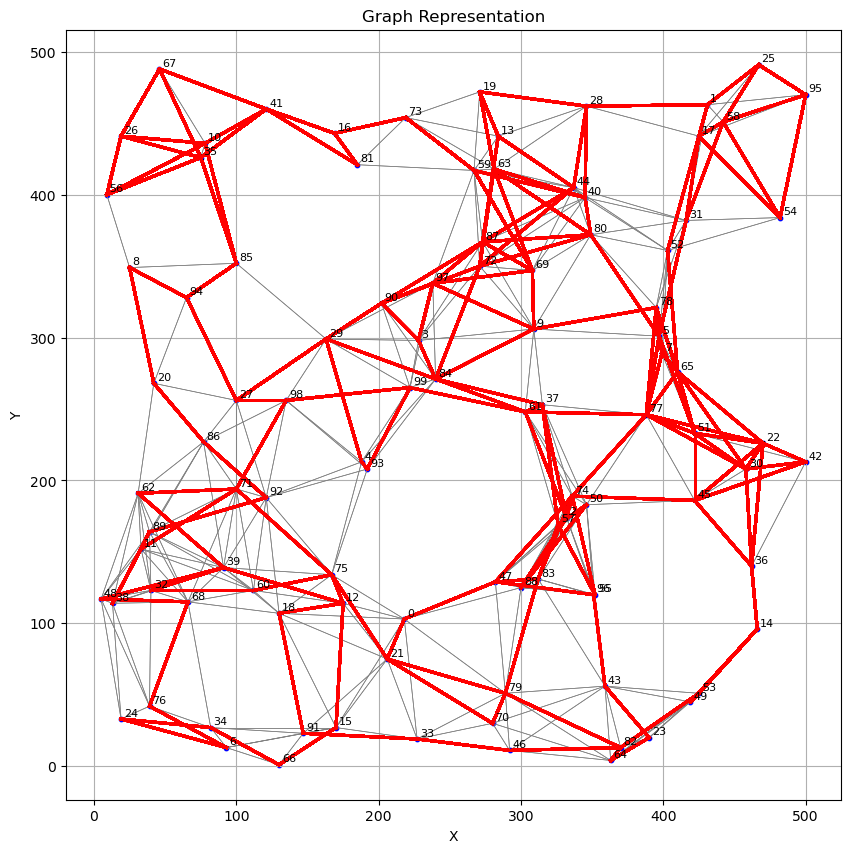

In [ ]:
#plot the cycle
plot_graph_(random_points, graph, individual)

### 1 the fitness function : for the evaluation of the generated individuals or cycles
- the fitness function defines the summation of the eucleudien distance between each pair of cities in the cycle based on their reel coordonate on the graph .

In [ ]:

# calculate the fitness of the individuals
def calculate_fitness(individual):
    fitness = 0
    visited = set(individual)

    # Calculate path fitness
    for i in range(len(individual) - 1):
        node1 = individual[i]
        node2 = individual[i + 1]
        fitness += euclidean_distance(random_points[node1], random_points[node2])

    # Add penalty for missing nodes
    missing_nodes = set(graph.keys()) - visited
    fitness += len(missing_nodes) * 1000  # Add a penalty of 1000 per missing node
    if individual[0] != individual[-1]:
        fitness += 10000  # Add a penalty of 10000 if the cycle is not closed
    return fitness


In [ ]:
# Example Usage

individual = create_cycle(graph)
fitness = calculate_fitness(individual)
print("Individual length = ", len(individual))
print("Fitness:", fitness)

Individual length =  189
Fitness: 11067.208321362383


### 2 the parents selection
As we know in the GA process we had to select two parent for the generation of a new child or elements , we select the parents in our implementations based on the competition between individuals .  

In [ ]:
# parent selection function
def select_parents(population, k=3):
        # Perform tournament selection

            parents = random.sample(population, k)
            parent1 = min(parents, key=calculate_fitness)

            parents = random.sample(population, k)
            parent2 = min(parents, key=calculate_fitness)


            return parent1, parent2


### creation of the first population  and we evaluate it as an primary step of the application of GA

In [ ]:
# generate the initial population of cycles
n_population = 50
population = [create_cycle(graph) for _ in range(n_population)]
print("Population Size:", len(population))

Population Size: 50


#### the evaluation of each element of the population

In [ ]:
for individual in population:
    print(f'individual size : {len(individual)} , fitness value = {calculate_fitness(individual)}')

individual size : 329 , fitness value = 19957.22256266566
individual size : 420 , fitness value = 25537.340359251102
individual size : 324 , fitness value = 19583.083570565286
individual size : 378 , fitness value = 22603.021800016377
individual size : 305 , fitness value = 18092.49306563058
individual size : 396 , fitness value = 23697.2793130117
individual size : 489 , fitness value = 29909.635726763892
individual size : 1413 , fitness value = 85943.85369758966
individual size : 216 , fitness value = 12919.402665882872
individual size : 172 , fitness value = 10002.349578808351
individual size : 446 , fitness value = 28108.661095673884
individual size : 1133 , fitness value = 67622.080261717
individual size : 989 , fitness value = 59343.065708327376
individual size : 592 , fitness value = 36200.511210563374
individual size : 257 , fitness value = 15198.4541029331
individual size : 548 , fitness value = 33779.81970427138
individual size : 542 , fitness value = 32283.452371632233
indivi

In [ ]:
print(" hieghest fitness value in the population", max([calculate_fitness(individual) for individual in population]))
print(" lowest fitness value in the population", min([calculate_fitness(individual) for individual in population]))

 hieghest fitness value in the population 85943.85369758966
 lowest fitness value in the population 9545.180711199528


#### Example of selection of two parents

In [ ]:
# Example Usage
parent_1, parent_2 = select_parents(population)
print("Parent 1:", parent_1)
print("parent1 length:", len(parent_1))
print("Parent 2:", parent_2)
print("parent2 length:", len(parent_2))

Parent 1: [72, 84, 90, 97, 99, 4, 29, 27, 92, 86, 89, 62, 48, 39, 18, 15, 66, 6, 24, 34, 76, 32, 38, 68, 11, 60, 12, 21, 79, 43, 53, 14, 36, 45, 51, 7, 78, 65, 77, 74, 88, 50, 47, 96, 83, 55, 2, 57, 37, 9, 87, 3, 99, 93, 75, 0, 33, 46, 70, 64, 23, 49, 82, 79, 21, 91, 15, 12, 18, 21, 33, 0, 18, 60, 71, 98, 29, 85, 35, 10, 26, 56, 8, 20, 94, 27, 20, 86, 62, 20, 27, 71, 11, 38, 32, 68, 71, 60, 39, 38, 39, 62, 68, 62, 38, 89, 71, 75, 60, 68, 32, 62, 48, 62, 68, 76, 6, 66, 34, 15, 21, 33, 70, 79, 47, 96, 43, 46, 64, 53, 64, 46, 43, 53, 23, 49, 53, 82, 64, 79, 43, 49, 82, 64, 79, 88, 50, 61, 37, 50, 37, 84, 3, 9, 69, 80, 44, 63, 28, 13, 40, 52, 17, 95, 25, 58, 54, 31, 1, 31, 5, 7, 65, 22, 30, 42, 36, 30, 42, 36, 30, 22, 51, 22, 36, 45, 30, 36, 22, 42, 45, 36, 14, 53, 64, 49, 64, 49, 43, 53, 23, 49, 43, 70, 33, 21, 91, 15, 6, 24, 34, 15, 33, 21, 91, 33, 79, 21, 70, 33, 15, 18, 21, 0, 47, 88, 74, 88, 55, 50, 88, 74, 96, 74, 77, 22, 65, 5, 31, 52, 31, 54, 17, 28, 19, 73, 59, 81, 41, 16, 73, 59,

### 3 the cross-over function

In [ ]:
# final crossover function for the cycle

def my_crossover_opt_cycle(parent1 , parent2):

# full code will be uploaded after the publication of the papers

    if child_validated:
        return sorted(child_validated , key=calculate_fitness)[0]
    else:
        return sorted(child , key=len)[0]

In [ ]:
#test the crossover function
parent1 = create_cycle(graph)
parent2 = create_cycle(graph)
child = my_crossover_opt_cycle(parent1, parent2)
print("Parent 1:", len(parent1))
print("Parent 2:", len(parent2))
print("Child:", len(child))
print("Parent 1:", len(set(parent1)))
print("Parent 2:", len(set(parent2)))
print("Child:", len(set(child)))
print("is it valid", is_valid_cycle(child))

175 214 23 69
cross1 78 78
cross2 36 36
parent1 5
parent2 14
Parent 1: 982
Parent 2: 239
Child: 989
Parent 1: 100
Parent 2: 100
Child: 100
is it valid True


### 4 the mutation function

In [ ]:
# mutation function
def mutation(individual):

    Stop = False
    while not Stop :
        mutated_node = random.choice(list(graph.keys()))
        index = random.randint(0, len(individual) - 1)
        if mutated_node != individual[index]:
            if index>0 and index < len(individual) - 1:
                if mutated_node in graph[individual[index - 1]] and individual[index + 1] in graph[mutated_node]:
                    Stop = True
                    individual[index] = mutated_node

    return individual

In [ ]:
# final version of the code
def mutation(individual):
    max_attempts = 100
    attempts = 0

    while attempts < max_attempts:
        attempts += 1
        index = random.randint(1, len(individual) - 2)
        mutated_node = random.choice(list(graph.keys()))

        # Validate the mutation
        if mutated_node in graph[individual[index - 1]] and individual[index + 1] in graph[mutated_node]:
            new_individual = individual[:]
            new_individual[index] = mutated_node

            if is_valid_cycle(new_individual):
                return new_individual

    # If mutation fails, return the original individual
    return individual

In [ ]:
# Example Usage
individual = create_cycle(graph)
print("Original Individual:", individual)
print("original individual length:", len(individual))
print("original individual  unique length:", len(set(individual)))
print("Original Fitness:", calculate_fitness(individual))
mutated_individual = mutation(individual)
print("Mutated Individual:", mutated_individual)
print("Mutated Individual Length:", len(mutated_individual))
print("Mutated Individual uniique Length:", len(set(mutated_individual)))
print("Mutated Fitness:", calculate_fitness(mutated_individual))


Original Individual: [51, 30, 77, 65, 78, 5, 9, 69, 40, 31, 58, 54, 95, 25, 17, 28, 13, 44, 52, 80, 87, 59, 81, 73, 16, 41, 10, 56, 8, 94, 27, 92, 4, 75, 39, 18, 15, 0, 12, 21, 70, 79, 47, 88, 74, 45, 50, 55, 57, 83, 43, 96, 2, 37, 61, 99, 29, 3, 90, 72, 63, 19, 13, 19, 59, 97, 84, 93, 98, 71, 86, 11, 60, 32, 38, 48, 24, 76, 68, 34, 6, 91, 33, 46, 82, 49, 53, 23, 64, 70, 46, 33, 91, 66, 91, 33, 15, 6, 15, 33, 79, 43, 55, 43, 70, 64, 23, 82, 79, 33, 91, 33, 79, 82, 64, 49, 14, 36, 22, 42, 22, 36, 22, 42, 30, 51, 7, 77, 65, 77, 5, 77, 5, 9, 80, 52, 54, 58, 1, 58, 17, 95, 25, 95, 17, 28, 13, 59, 13, 63, 13, 87, 3, 72, 44, 80, 87, 3, 84, 4, 99, 61, 9, 78, 9, 97, 3, 99, 97, 9, 5, 7, 5, 52, 54, 58, 17, 58, 54, 31, 5, 78, 31, 40, 59, 69, 72, 97, 87, 63, 59, 63, 80, 40, 44, 80, 69, 63, 28, 40, 63, 72, 90, 84, 97, 29, 85, 35, 26, 67, 41, 81, 16, 41, 67, 35, 26, 56, 35, 67, 26, 35, 10, 35, 26, 10, 67, 10, 85, 8, 20, 62, 89, 48, 89, 32, 62, 11, 32, 62, 39, 11, 68, 32, 62, 20, 94, 8, 85, 35, 10, 5

### definition of the GA

In [ ]:
import time
# final version of the code
mutation_rate = 0.20
max_generations =300
n_population = 50
def genetic_algorithm(population):
    start_time =time.perf_counter_ns() * 1e-6
    total_population = []
    for generation in range(max_generations):
        total_population += population
        # Sort population by fitness
        population = sorted(population, key=calculate_fitness)

        # Preserve the top 2 individuals
        new_population = population[:2]

        while len(new_population) < len(population):
            parent1, parent2 = select_parents(population)
            offspring = my_crossover_opt_cycle2(parent1, parent2)

            if random.random() < mutation_rate:
                offspring = mutation(offspring)

            # Validate offspring
            if is_valid_cycle(offspring):
                new_population.append(offspring)

        population = new_population
        total_population += population

        # Track progress
        best_individual = population[0]
        print(f"Generation {generation + 1}: Best fitness = {calculate_fitness(best_individual)}, len unique = {len(set(best_individual))}")
        end_time = time.perf_counter_ns() * 1e-6 - start_time
    return population[0] , total_population , end_time



### the execution of the genetic Algorithm

In [ ]:
best , new_population , time = genetic_algorithm(population)

Generation 1: Best fitness = 9545.180711199528, len unique = 100
Generation 2: Best fitness = 9281.859841698564, len unique = 100
Generation 3: Best fitness = 9281.859841698564, len unique = 100
Generation 4: Best fitness = 9281.859841698564, len unique = 100
Generation 5: Best fitness = 9222.710374507966, len unique = 100
Generation 6: Best fitness = 9222.710374507966, len unique = 100
Generation 7: Best fitness = 8686.85225483953, len unique = 100
Generation 8: Best fitness = 8653.761007305673, len unique = 100
Generation 9: Best fitness = 8482.711683953105, len unique = 100
Generation 10: Best fitness = 8376.053529747622, len unique = 100
Generation 11: Best fitness = 8359.198700787365, len unique = 100
Generation 12: Best fitness = 8184.005895789456, len unique = 100
Generation 13: Best fitness = 8184.005895789456, len unique = 100
Generation 14: Best fitness = 8045.065126642167, len unique = 100
Generation 15: Best fitness = 7884.828195934327, len unique = 100
Generation 16: Best 

In [ ]:
print("time of execution : " , time ,"ms")

time of execution :  22297.111299991608 ms


In [ ]:
print("is the best individual valid", is_valid_cycle(best))

is the best individual valid True


In [ ]:
print("best" , best)
print("best" , len(set(best)))
print("best" , len(best))

best [77, 65, 51, 65, 7, 5, 80, 40, 44, 13, 19, 73, 16, 41, 67, 10, 26, 35, 56, 8, 20, 62, 11, 86, 27, 98, 99, 84, 99, 29, 90, 97, 87, 72, 9, 80, 31, 17, 25, 95, 58, 54, 52, 78, 5, 7, 65, 22, 30, 45, 42, 36, 14, 53, 49, 23, 82, 64, 43, 96, 57, 74, 88, 0, 15, 12, 60, 32, 48, 38, 76, 34, 66, 6, 24, 76, 32, 89, 60, 18, 75, 4, 93, 92, 39, 60, 68, 18, 91, 33, 79, 46, 70, 21, 75, 71, 86, 27, 94, 85, 10, 35, 41, 16, 81, 59, 69, 80, 40, 28, 1, 28, 13, 63, 87, 3, 84, 61, 37, 2, 55, 96, 83, 47, 50, 77]
best 100
best 126


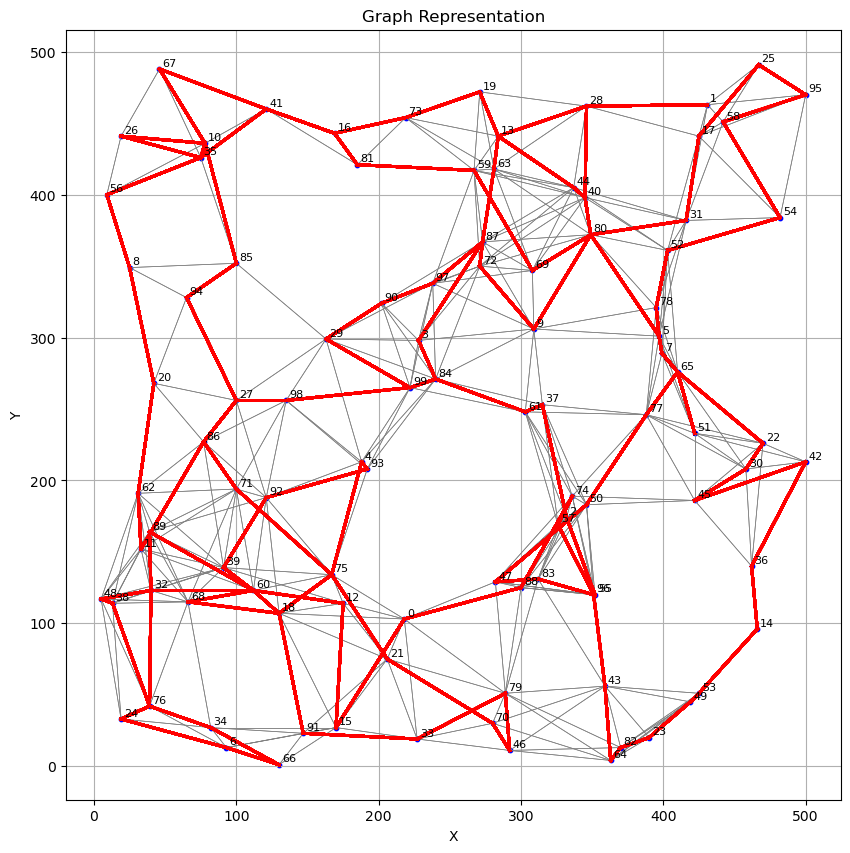

In [ ]:
# plot the best individual cycle
plot_graph_(random_points, graph, best)

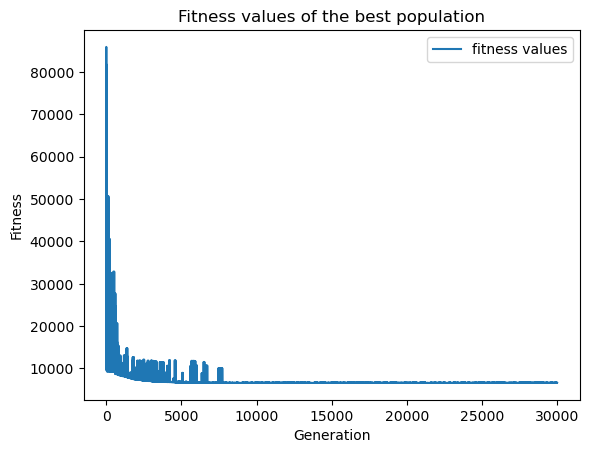

In [ ]:
# plot the fitness function of the best population
fitness_values = [calculate_fitness(individual) for individual in new_population]
plt.plot(fitness_values , label = "fitness values")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness values of the best population")
plt.legend()
plt.show()

### II - Hill climbing Algorithm

In [ ]:
import time
# hill climbing algorithm for our problem
def hill_climbing(graph , max_iterations = 1000):
    # time in millie seconds
    start_time =time.perf_counter_ns() * 1e-6

    # Create a random initial individual
    current = create_cycle(graph)
    current_fitness = calculate_fitness(current)

    # Keep track of the best individual
    best = current
    best_fitness = current_fitness
    generation = [current]

    # Iterate until no better neighbors are found
    for iteration in range(max_iterations):
        # Generate a neighbor
        neighbor = mutation(current)
        neighbor_fitness = calculate_fitness(neighbor)
        generation.append(neighbor)
        # Update the best individual
        if neighbor_fitness < best_fitness:
            best = neighbor
            best_fitness = neighbor_fitness


        current = best
        current_fitness = best_fitness


        print(f"Iteration {iteration + 1}: Best cost = {current_fitness}")

        end_time = time.perf_counter_ns() * 1e-6 - start_time


    return current , generation , end_time


In [ ]:
x= create_cycle(graph)
print("cycle length", len(x) , "is valid" , is_valid_cycle(x))
best_hill, generation_hill, elapsed_time = hill_climbing(graph)
print("best individual", best , "best fitness", calculate_fitness(best) , "time taken", elapsed_time,'ms')

cycle length 258 is valid True
Iteration 1: Best cost = 11653.409232480559
Iteration 2: Best cost = 11600.91329039636
Iteration 3: Best cost = 11599.126891229202
Iteration 4: Best cost = 11583.463496276965
Iteration 5: Best cost = 11535.136729390195
Iteration 6: Best cost = 11535.136729390195
Iteration 7: Best cost = 11535.136729390195
Iteration 8: Best cost = 11535.136729390195
Iteration 9: Best cost = 11523.356264085165
Iteration 10: Best cost = 11523.356264085165
Iteration 11: Best cost = 11523.356264085165
Iteration 12: Best cost = 11461.19368336488
Iteration 13: Best cost = 11461.19368336488
Iteration 14: Best cost = 11461.19368336488
Iteration 15: Best cost = 11461.19368336488
Iteration 16: Best cost = 11461.19368336488
Iteration 17: Best cost = 11433.575178782183
Iteration 18: Best cost = 11407.771401993541
Iteration 19: Best cost = 11407.771401993541
Iteration 20: Best cost = 11404.710452170435
Iteration 21: Best cost = 11404.710452170435
Iteration 22: Best cost = 11404.7104521

In [ ]:
print("is valide = " , is_valid_cycle(best_hill))

is valide =  True


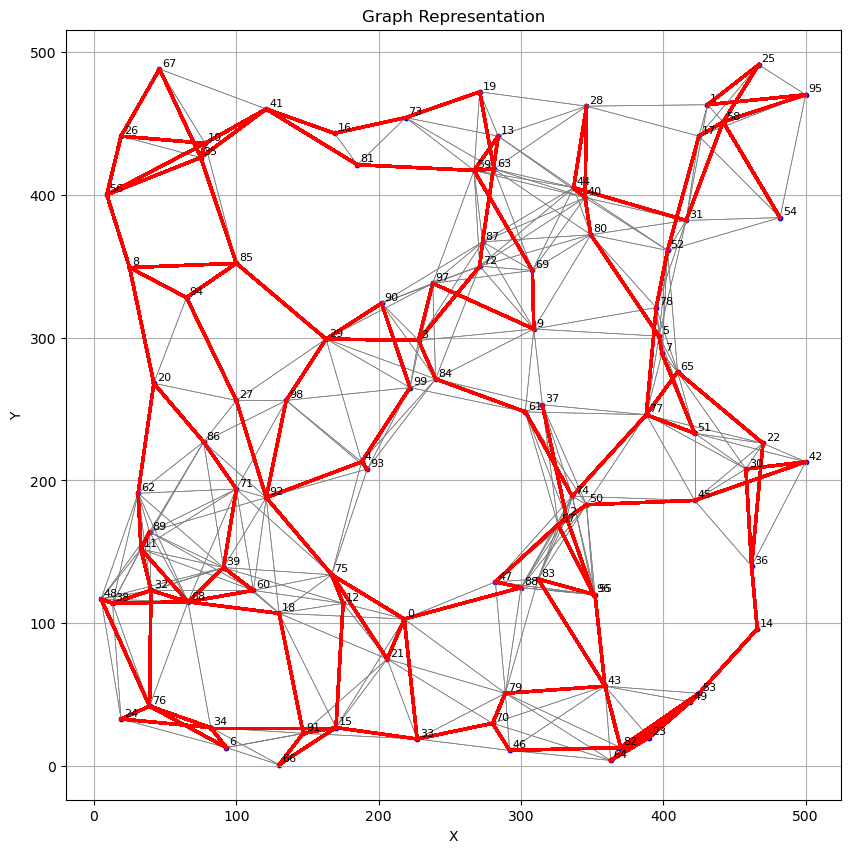

In [ ]:
plot_graph_(random_points, graph, best_hill)

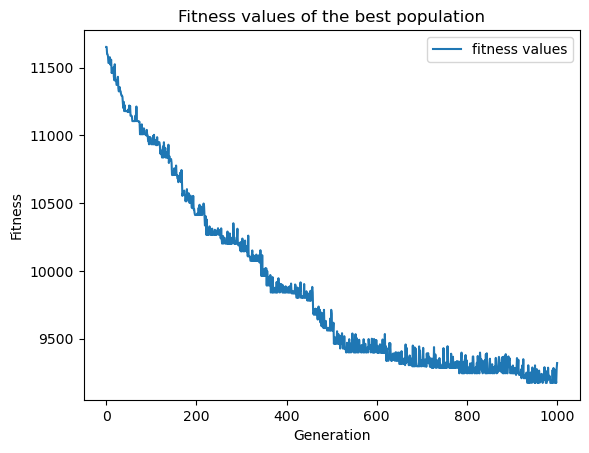

In [ ]:
# plot the fitness function of the generation
fitness_values = [calculate_fitness(individual) for individual in generation_hill]
plt.plot(fitness_values , label = "fitness values")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness values of the best population")
plt.legend()
plt.show()
